**Homework 4**

(1): 
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use random.seed(1), prior to starting part (a) to ensure consistent results. (**3 pts**)

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

(a) Using the random.normal() function, create a vector, $x$, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, $X$.

In [25]:
np.random.seed(0)

x = np.random.normal(0,1,100)
print(x)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

(b) Using the random.normal() function, create a vector, $eps$, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [26]:
np.random.seed(1)

eps = np.random.normal(0, np.sqrt(0.25), 100)
print(eps)

[ 0.81217268 -0.30587821 -0.26408588 -0.53648431  0.43270381 -1.15076935
  0.87240588 -0.38060345  0.15951955 -0.12468519  0.73105397 -1.03007035
 -0.1612086  -0.19202718  0.56688472 -0.54994563 -0.0862141  -0.43892921
  0.02110687  0.29140761 -0.55030959  0.57236185  0.45079536  0.25124717
  0.45042797 -0.34186393 -0.06144511 -0.46788472 -0.13394404  0.26517773
 -0.34583038 -0.19837676 -0.34358635 -0.42260282 -0.33562307 -0.0063323
 -0.55865517  0.11720785  0.82990109  0.37102208 -0.09591778 -0.44381448
 -0.37357915  0.8462273   0.02540388 -0.31849782  0.09545774  1.05012757
  0.06007948  0.30860155  0.15008516 -0.17612492 -0.5712591  -0.17467136
 -0.10444712  0.2933116   0.41949171  0.46555104  0.14279366  0.44257058
 -0.37719897  0.62643408  0.25646491 -0.14904642  0.24425907 -0.03778586
  0.56581469  0.75990841  1.0927877  -0.69824817 -0.7220569  -0.25223293
  0.08001853  0.43808446  0.15781747 -1.01110061 -0.15310201  0.41398732
  0.11504737  0.38100559 -0.11116407 -0.10037903  0.

(c) Using $x$ and $eps$, generate a vector $y$ according to the model

$Y = −1 + 0.5X + \epsilon$ (3.39)

What is the length of the vector $y$? What are the values of $\beta_0$
and $\beta_1$ in this linear model?

In [27]:
b_0 = -1
b_1 = 0.5
y = b_0 + b_1*x + eps
print(y)
print('The length of y is: ' + str(len(y)))

[ 6.94198855e-01 -1.10579960e+00 -7.74716884e-01 -4.16037711e-01
  3.66482810e-01 -2.63940829e+00  3.47450091e-01 -1.45628205e+00
 -8.92089878e-01 -9.19385937e-01 -1.96924246e-01 -1.30293360e+00
 -7.80689739e-01 -1.13118967e+00 -2.11183662e-01 -1.38310847e+00
 -3.39174567e-01 -1.54150834e+00 -8.22359276e-01 -1.13564026e+00
 -2.82680450e+00 -1.00828847e-01 -1.16986540e-01 -1.11983534e+00
  5.85305287e-01 -2.06904677e+00 -1.03856585e+00 -1.56147664e+00
 -3.67554433e-01 -1.42881681e-04 -1.26835666e+00 -1.00929550e+00
 -1.78747922e+00 -2.41300105e+00 -1.50957914e+00 -9.28157815e-01
 -9.43509834e-01 -2.81602227e-01 -3.63762320e-01 -7.80129295e-01
 -1.62019426e+00 -2.15382345e+00 -2.22671424e+00  8.21614998e-01
 -1.22942221e+00 -1.53753497e+00 -1.53093994e+00  4.38872746e-01
 -1.74686945e+00 -7.97768585e-01 -1.29764812e+00 -9.82673674e-01
 -1.82666167e+00 -1.76498745e+00 -1.11853823e+00 -4.92522469e-01
 -5.47249682e-01 -3.83213010e-01 -1.17436738e+00 -7.38800001e-01
 -1.71342919e+00 -5.53342

#### Answer:

$\beta_0$ is equal to $-1$ 

$\beta_1$ is equal to $0.5$ 

The length of Y is $100$. 

(d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

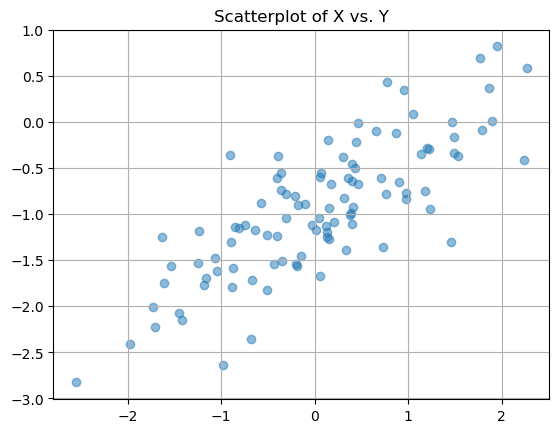

In [28]:
plt.scatter(x, y, alpha=0.5)
plt.title('Scatterplot of X vs. Y')
plt.grid(True)
plt.show()

(e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta_0}$ and
$\hat{\beta_1}$ compare to $\beta_0$ and
$\beta_1$?

slope: 0.5656018815230601, intercept: -0.973632092311373


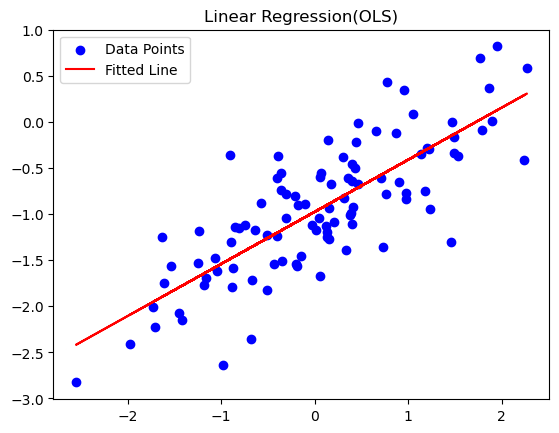

In [15]:
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"slope: {slope}, intercept: {intercept}")

# plot
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(x), color='red', label='Fitted Line')
plt.title('Linear Regression(OLS)')
plt.legend()
plt.show()

#### Answer:

$\hat{\beta_0} = -0.974$, $\beta_0 = -1$ 

$\hat{\beta_1} = 0.566$, $\beta_1 = 0.5$ 

(f) Repeat (a)–(e) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term in (b). Describe your results.

slope: 0.5213043450554207, intercept: -1.0022730031888285


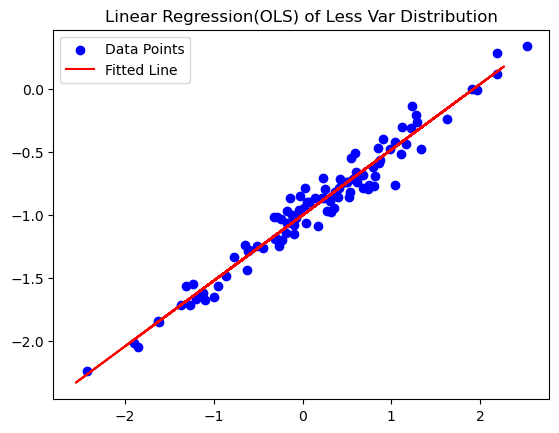

In [16]:
x_1 = np.random.normal(0, 1, 100)
eps_1 = np.random.normal(0, 0.1, 100)
y_1 = -1 + 0.5 * x_1 + eps_1


x_1 = x_1.reshape(-1, 1)
model = LinearRegression()
model.fit(x_1, y_1)

slope = model.coef_[0]
intercept = model.intercept_
print(f"slope: {slope}, intercept: {intercept}")

# plot
plt.scatter(x_1, y_1, color='blue', label='Data Points')
plt.plot(x, model.predict(x), color='red', label='Fitted Line')
plt.title('Linear Regression(OLS) of Less Var Distribution')
plt.legend()
plt.show()

(g) Repeat (a)–(e) after modifying the data generation process in such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term in (b). Describe your results

slope: 0.3687368802900296, intercept: -0.9704991332330669


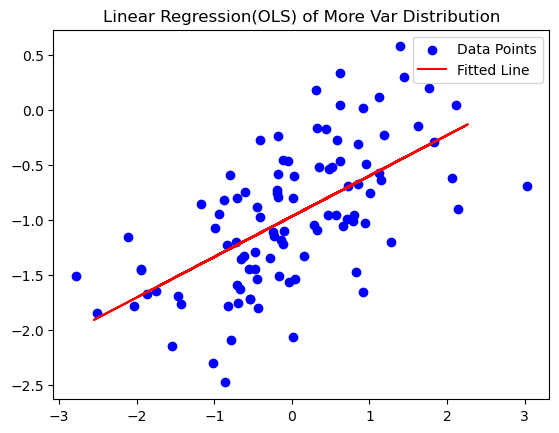

In [17]:
x_2 = np.random.normal(0, 1, 100)
eps_2 = np.random.normal(0, 0.5, 100)
y_2 = -1 + 0.5 * x_2 + eps_2


x_2 = x_2.reshape(-1, 1)
model = LinearRegression()
model.fit(x_2, y_2)

slope = model.coef_[0]
intercept = model.intercept_
print(f"slope: {slope}, intercept: {intercept}")

# plot
plt.scatter(x_2, y_2, color='blue', label='Data Points')
plt.plot(x, model.predict(x), color='red', label='Fitted Line')
plt.title('Linear Regression(OLS) of More Var Distribution')
plt.legend()
plt.show()

(2): In this exercise, you will implement KNN algorithm and compute Root Mean Square Error (RMSE) for different $k$ values in (a) and (b). The first steps are already completed. (**2 pts**)

In [19]:
import pandas as pd
df = pd.read_csv('train.csv')

Impute missing values

In [22]:
df.isnull().sum()
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() 
df['Outlet_Size'].fillna(mode[0], inplace =True)

Change Categorical variables to dummy variables

In [23]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

Split train and test data

In [24]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

Scale the features

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [26]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

(a) Implement KNN regression and compute the RMSE for a range of values of $k$ from 1 to 25. You may first fit the regression model into train set, i.e., x_train, y_train, and then make predictions on the test set using x_test. Finally, the RMSE between actual y_test and predictions can be calculated.  

In [27]:
rmse_values = []

for k in range(1, 26):
    model_knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(x_train_scaled, y_train)
    y_pred = model_knn.predict(x_test_scaled)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

print(rmse_values)

[1574.7433781375528, 1339.640086871271, 1282.2116881506035, 1249.9421492918566, 1241.6896562871857, 1232.9553114468622, 1226.128310774739, 1221.409761493729, 1221.9520554774283, 1229.5376241923022, 1233.1371312290887, 1235.2308251376662, 1239.366262525741, 1241.9127450052301, 1247.2192496213033, 1253.7332282333314, 1259.6175859476118, 1264.1400446985178, 1272.9929295426068, 1278.8564901426635, 1286.6907859873384, 1290.04223967066, 1295.9667503552096, 1299.5562343720137, 1303.218483805413]


(b) Plot the RMSE values against $k$ values.

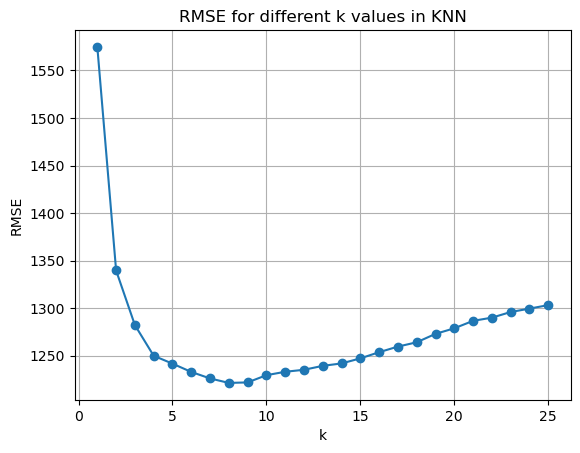

In [30]:
plt.plot(range(1, 26), rmse_values, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('RMSE for different k values in KNN')
plt.show()